# TP 5 Réseaux de neurones - Multi classification et Propagation en arrière
Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

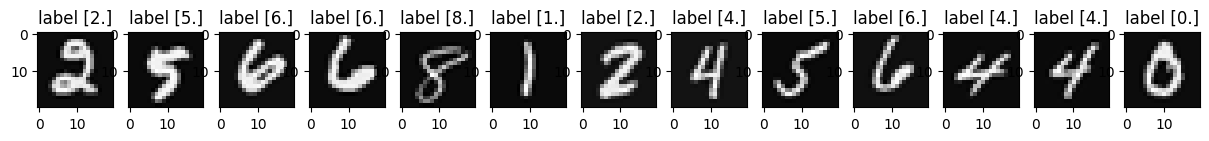

In [ ]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [ ]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [ ]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

<ipython-input-7-c82e5b32972d>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  YY[i,int(y[i])]=1


# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [ ]:
# poids de la couche 1
W1 = np.genfromtxt('W1(1).csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [ ]:
# poids de la couche 2
W2 = np.genfromtxt('W2(1).csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [ ]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

# Calcul du coût

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))

In [ ]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X;

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size))

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))
    a3= np.zeros((YY.shape[0],YY.shape[1]))

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    J=np.zeros((YY.shape[0],1))
    J= (1/y.shape[0])*(np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3)))))

    return J

# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [ ]:
def sigmoid_gradient(z):
    return Sigmoid(z) * (1 - Sigmoid(z))

In [ ]:
def NNCostFunction(X, YY, theta1, theta2, hidden_layer_size, lambda_= 0):
    m = len(X)  # Nombre d'exemples d'entraînement

    # Initialisation du coût et du gradient
    J = 0
    theta1_grad = np.zeros_like(theta1)
    theta2_grad = np.zeros_like(theta2)

    # Calcul de l'activation de la couche cachée
    z1 = np.matmul(X, theta1.T)
    a1 = Sigmoid(z1)

    intercept = np.ones((X.shape[0], 1))
    a1_with_intercept = np.concatenate((intercept,a1), axis=1)

    # Calcul de l'activation de la couche de sortie
    a2 = Sigmoid(np.matmul(a1_with_intercept, theta2.T))

    # Calcul du coût
    J = (-1 / m) * np.sum(YY * np.log(a2) + (1 - YY) * np.log(1 - a2))

    # Calcul de la régularisation
    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(theta1[:, 1:])) + np.sum(np.square(theta2[:, 1:])))
    J += reg_term

    # Backpropagation
    delta3 = a2 - YY
    delta2 = np.dot(delta3, theta2)[:, 1:] * sigmoid_gradient(z1)

    # Gradient pour theta2
    theta2_grad = (1 / m) * np.dot(delta3.T, a1_with_intercept)

    # Gradient pour theta1
    theta1_grad = (1 / m) * np.dot(delta2.T, X)

    return J, [theta1_grad, theta2_grad]



# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [ ]:
def gradientDescent(X, y, theta, alpha, iterations,lambda_= 0):
  # garder aussi le cout à chaque itération
  # pour afficher le coût en fonction de theta0 et theta1
  theta0_list = []
  theta1_list = []
  cost_list = []

  for _ in range(iterations):
    cout , d = NNCostFunction(X, y, theta[0], theta[1], hidden_layer_size, lambda_)
    theta[0] = theta[0] - alpha * d[0]
    theta[1] = theta[1] - alpha * d[1]

    theta0_list.append(theta[0])
    theta1_list.append(theta[1])
    cost_list.append(cout)

  return theta,cost_list,theta0_list,theta1_list


In [ ]:
def tracer_cout_it(cost_list):
  iterations = range(1, len(cost_list) + 1)
  # Tracer le graphe du coût en fonction du nombre d'itérations
  plt.plot(iterations, cost_list, marker='o', linestyle='-')

  plt.xlabel('Nombre d\'itérations')
  plt.ylabel('Coût')

  plt.title('Évolution du coût en fonction du nombre d\'itérations')

  plt.grid(True)

  plt.show()

In [ ]:
iterations = 500
alpha = 1.5
theta = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]

theta, costs, theta0_list, theta1_list = gradientDescent(X, YY, theta, alpha, iterations)

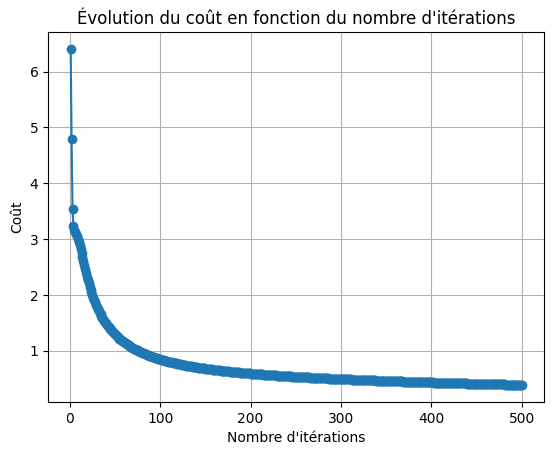

In [ ]:
tracer_cout_it(costs)

In [ ]:
computeCost(X, YY, theta[0], theta[1], hidden_layer_size, 0)

0.38823918917304345

# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [ ]:
iterations = 500
alpha = 1.5
theta_reg = [np.random.normal(0, np.sqrt(1/212), W1.shape), np.random.normal(0, np.sqrt(1/17), W2.shape)]

theta_reg, costs, theta0_list, theta1_list = gradientDescent(X, YY, theta, alpha, iterations,lambda_=1)

# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [ ]:
def predict(W1, W2, X):

    # Calcul de l'activation de la couche cachée
    a1 = Sigmoid(np.matmul(X, W1.T))

    intercept = np.ones((X.shape[0], 1))
    a1_with_intercept = np.concatenate((intercept,a1), axis=1)

    # Calcul de l'activation de la couche de sortie
    a2 = Sigmoid(np.matmul(a1_with_intercept, W2.T))

    # Choix de la classe prédite
    y_pred = np.argmax(a2, axis=1)[..., np.newaxis]

    return y_pred

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict(theta[0], theta[1], X)
precision = np.mean(y==y_pred)*100
precision

97.22

In [ ]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred = predict(theta_reg[0], theta_reg[1], X)
precision = np.mean(y==y_pred)*100
precision

97.22

# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='logistic', solver='sgd', max_iter=10000)

# Entraîner le modèle avec les données
model.fit(X, y)

# Prédire les classes avec les données X
y_pred = model.predict(X)

# Calculer la précision
precision = accuracy_score(y, y_pred)

print("Précision du modèle : {:.2f}%".format(precision * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Précision du modèle : 93.46%


# Optionnel 2 : Renforcement de l'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage